xESMF Test - MPI-ESM1-2 MPIOM (HR: TP04, ~0.5°; LR: GR15, ~1.5°)
================

### Basic Imports

In [1]:
%matplotlib inline
import intake
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
from clisops.core import subset
import clisops as cl
print("Using roocs/clisops in version %s" % cl.__version__)
print("Using xESMF in version %s" % xe.__version__)

# Turn off the xarray warnings
import warnings
warnings.simplefilter("ignore") 
#with warnings.catch_warnings():
#        warnings.simplefilter("ignore")

xr.set_options(display_style='html');

Using roocs/clisops in version 0.3.1
Using xESMF in version 0.4.0


### Load the datasets

In [2]:
# Load intake catalogue
col_url = "/work/ik1017/Catalogs/mistral-cmip6.json"
col = intake.open_esm_datastore(col_url)

# Select tos_Omon and fx_areacello for LR and HR model resolution
#  and historical, historical
cat = col.search(activity_id=["CMIP"], 
                 source_id=["MPI-ESM1-2-HR", "MPI-ESM1-2-LR"],
                 experiment_id=["historical"], 
                 member_id="r1i1p1f1", 
                 variable_id=["tos", "areacello"],
                 table_id=["Omon", "Ofx"])

In [3]:
cat.df

activity_id institution_id      source_id experiment_id member_id table_id  \
0         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1      Ofx   
1         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
2         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
3         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
4         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
5         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
6         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
7         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
8         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
9         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
10        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
11        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
12        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
13        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
14        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
15        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
16        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
17        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
18        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
19        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
20        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
21        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
22        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
23        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
24        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
25        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
26        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
27        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
28        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
29        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
30        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
31        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
32        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
33        CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1     Omon   
34        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1      Ofx   
35        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Omon   
36        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Omon   
37        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Omon   
38        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Omon   
39        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Omon   
40        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Omon   
41        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Omon   
42        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Omon   
43        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Omon   

   variable_id grid_label  dcpp_init_year    version     time_range  \
0    areacello         gn             NaN  v20190710            NaN   
1          tos         gn             NaN  v20190710  185001-185412   
2          tos         gn             NaN  v20190710  185501-185912   
3          tos         gn             NaN  v20190710  186001-186412   
4 

In [4]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {}, 'decode_times': True})

for dict_key in dset_dict.keys(): print(dict_key)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


CMIP.MPI-M.MPI-ESM1-2-HR.historical.Ofx.gn
CMIP.MPI-M.MPI-ESM1-2-LR.historical.Omon.gn
CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn
CMIP.MPI-M.MPI-ESM1-2-LR.historical.Ofx.gn


In [5]:
# Avoid single value coords
#ds = ds.squeeze()               # Remove single-value dimensions from variables
#ds = ds.reset_coords(drop=True) # Remove unused coordinate entries from ds 
                                 # (drops also the "wrong" coordinates (latitude, longitude))

# Select last 20 years of historical
ds_LR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-LR.historical.Omon.gn'].sel(time=slice('2010', '2014')).squeeze()
ds_HR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn'].sel(time=slice('2010', '2014')).squeeze()
# Select gridcell area
#ds_gridLR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-LR.historical.fx.gn'].squeeze()
#ds_gridHR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-HR.historical.fx.gn'].squeeze()
ds_gridOceLR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-LR.historical.Ofx.gn'].squeeze()
ds_gridOceHR = dset_dict['CMIP.MPI-M.MPI-ESM1-2-HR.historical.Ofx.gn'].squeeze()

### Take a look at the grids

In [6]:
ds_HR

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 802, j: 404, time: 60, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12...
  * j                   (j) int32 0 1 2 3 4 5 6 ... 397 398 399 400 401 402 403
  * i                   (i) int32 0 1 2 3 4 5 6 ... 795 796 797 798 799 800 801
    latitude            (j, i) float64 dask.array<chunksize=(404, 802), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(404, 802), meta=np.ndarray>
    member_id           <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(60, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(404, 802, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(404, 802, 4), meta=np.ndarray>
    tos                 (time, j, i) float32 dask.array<chunksize=(60, 404, 802), meta=np.ndarray>
Attributes:
    sub_experiment:          none
    data_specs_version:      01.00.30
    realization_index:       1
    intake_esm_varname:      ['tos']
    experiment:              all-forcing simulation of the recent past
    physics_index:           1
    activity_id:             CMIP
    product:                 model-output
    table_id:                Omon
    mip_era:                 CMIP6
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-E...
    experiment_id:           historical
    institution:             Max Planck Institute for Meteorology, Hamburg 20...
    realm:                   ocean
    source:                  MPI-ESM1.2-HR (2017): \naerosol: none, prescribe...
    sub_experiment_id:       none
    source_type:             AOGCM
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    grid:                    gn
    branch_time_in_parent:   0.0
    history:                 2019-08-25T06:00:45Z ; CMOR rewrote data to be c...
    source_id:               MPI-ESM1-2-HR
    cmor_version:            3.5.0
    external_variables:      areacello
    license:                 CMIP6 model data produced by MPI-M is licensed u...
    parent_time_units:       days since 1850-1-1 00:00:00
    branch_method:           standard
    parent_source_id:        MPI-ESM1-2-HR
    variable_id:             tos
    title:                   MPI-ESM1-2-HR output prepared for CMIP6
    nominal_resolution:      50 km
    parent_variant_label:    r1i1p1f1
    parent_experiment_id:    piControl
    contact:                 cmip6-mpi-esm@dkrz.de
    branch_time_in_child:    0.0
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    parent_mip_era:          CMIP6
    initialization_index:    1
    forcing_index:           1
    variant_label:           r1i1p1f1
    Conventions:             CF-1.7 CMIP-6.2
    tracking_id:             hdl:21.14100/ccd8388f-4f80-4a1e-ba47-66fe65bbeec...
    creation_date:           2019-08-25T07:51:32Z
    parent_activity_id:      CMIP
    frequency:               mon
    institution_id:          MPI-M
    project_id:              CMIP6
    grid_label:              gn
    intake_esm_dataset_key:  CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn

In [7]:
ds_LR

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 256, j: 220, time: 60, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12...
  * j                   (j) int32 0 1 2 3 4 5 6 ... 213 214 215 216 217 218 219
  * i                   (i) int32 0 1 2 3 4 5 6 ... 249 250 251 252 253 254 255
    latitude            (j, i) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    member_id           <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(60, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(220, 256, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(220, 256, 4), meta=np.ndarray>
    tos                 (time, j, i) float32 dask.array<chunksize=(60, 220, 256), meta=np.ndarray>
Attributes:
    sub_experiment:          none
    data_specs_version:      01.00.30
    realization_index:       1
    intake_esm_varname:      ['tos']
    experiment:              all-forcing simulation of the recent past
    physics_index:           1
    activity_id:             CMIP
    product:                 model-output
    table_id:                Omon
    mip_era:                 CMIP6
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-E...
    experiment_id:           historical
    institution:             Max Planck Institute for Meteorology, Hamburg 20...
    realm:                   ocean
    source:                  MPI-ESM1.2-LR (2017): \naerosol: none, prescribe...
    sub_experiment_id:       none
    source_type:             AOGCM
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    grid:                    gn
    branch_time_in_parent:   0.0
    history:                 2019-09-11T14:21:40Z ; CMOR rewrote data to be c...
    source_id:               MPI-ESM1-2-LR
    cmor_version:            3.5.0
    external_variables:      areacello
    license:                 CMIP6 model data produced by MPI-M is licensed u...
    parent_time_units:       days since 1850-1-1 00:00:00
    branch_method:           standard
    parent_source_id:        MPI-ESM1-2-LR
    variable_id:             tos
    title:                   MPI-ESM1-2-LR output prepared for CMIP6
    nominal_resolution:      250 km
    parent_variant_label:    r1i1p1f1
    parent_experiment_id:    piControl
    contact:                 cmip6-mpi-esm@dkrz.de
    branch_time_in_child:    0.0
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    parent_mip_era:          CMIP6
    initialization_index:    1
    forcing_index:           1
    variant_label:           r1i1p1f1
    Conventions:             CF-1.7 CMIP-6.2
    tracking_id:             hdl:21.14100/40326101-1a73-46bb-a1d8-edb6f6a4da7...
    creation_date:           2019-09-04T13:52:13Z
    parent_activity_id:      CMIP
    frequency:               mon
    institution_id:          MPI-M
    project_id:              CMIP6
    grid_label:              gn
    intake_esm_dataset_key:  CMIP.MPI-M.MPI-ESM1-2-LR.historical.Omon.gn

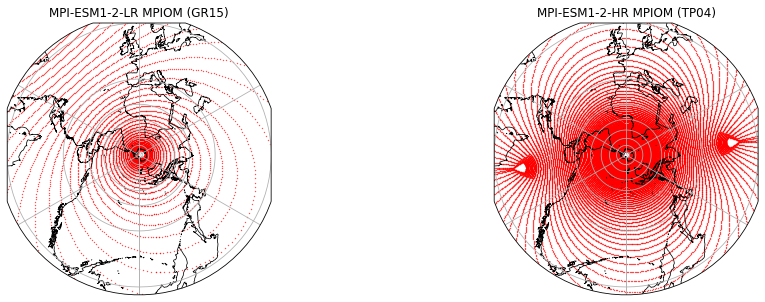

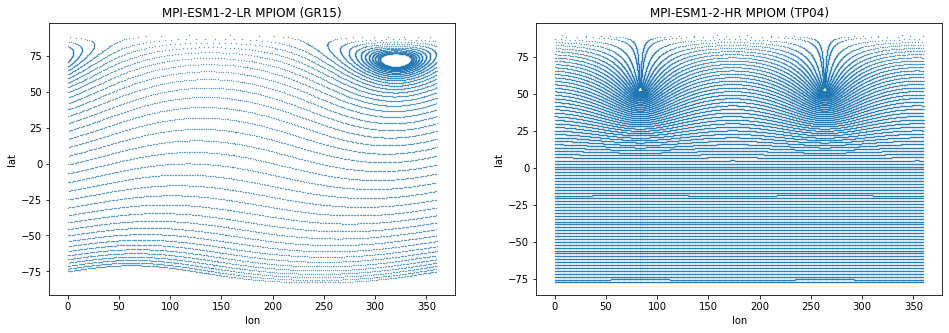

In [8]:
# Plot grid locations LR and HR

# polar projection
def polar_axis():
    '''cartopy geoaxes centered at north pole'''
    # as from https://github.com/JiaweiZhuang/regrid_test/blob/master/debug_bipolar_grid.ipynb
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,5), 
                             subplot_kw={'projection':ccrs.SouthPolarStereo(central_longitude=0)})
    axes[0].coastlines(linewidth=0.75, color='black', resolution='50m')
    axes[1].coastlines(linewidth=0.75, color='black', resolution='50m')
    axes[0].gridlines(crs=ccrs.PlateCarree(), linestyle='-')
    axes[1].gridlines(crs=ccrs.PlateCarree(), linestyle='-')
    axes[0].set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    axes[1].set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    return axes

axes=polar_axis()
axes[0].scatter(x=ds_gridOceLR['longitude'][::5], y=ds_gridOceLR['latitude'][::5], s=0.1,
                transform=ccrs.PlateCarree(), c='r')  
axes[1].scatter(x=ds_gridOceHR['longitude'][::5], y=ds_gridOceHR['latitude'][::5], s=0.1,
                transform=ccrs.PlateCarree(), c='r')  

axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');

# common scatter plot
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,5))
axes[0].scatter(x=ds_gridOceLR['longitude'][::5], y=ds_gridOceLR['latitude'][::5], s=0.1)
axes[1].scatter(x=ds_gridOceHR['longitude'][::5], y=ds_gridOceHR['latitude'][::5], s=0.1)
#axes[1].scatter(x=ds_gridOceHR['longitude'][204, :], y=ds_gridOceHR['latitude'][204, :], s=0.1)
axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');
#axes[1].set_ylim([-10, 10]);
#axes[0].set_ylim([-10, 10]);

### Plot the data

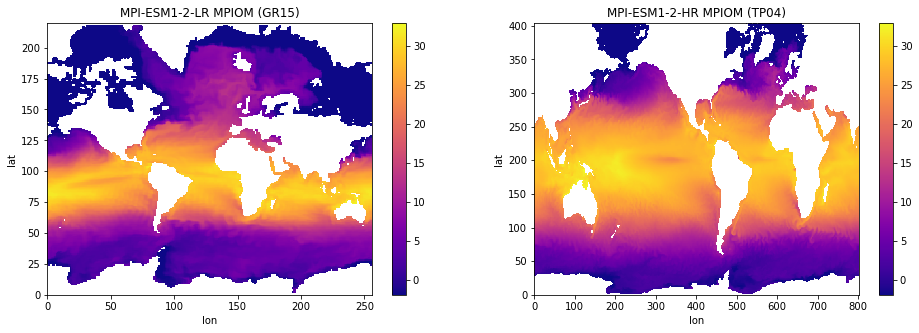

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,5))

im=axes[0].pcolormesh(ds_LR.tos.isel(time=0).values[::-1,:], cmap="plasma")
im=axes[1].pcolormesh(ds_HR.tos.isel(time=0).values[::-1,:], cmap="plasma")  
fig.colorbar(im, ax=axes[1])
fig.colorbar(im, ax=axes[0])

axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');


#plt.figure(figsize=(16,6));
#ax = plt.axes(projection=ccrs.PlateCarree());
#ds_HR.tos.isel(time=0).pcolormesh(ax=ax, x='longitude', y='latitude');
#plt.pcolormesh(ds_HR.tos.isel(time=0).values[::-1,:])
#ax.coastlines();

### Set up the source and destination grids

In [10]:
# Read the target grid (1deg, SCRIP format provided by 
#   Charlie Zender in course of the CMIP6 regridding weights discussion:
#   https://docs.google.com/document/d/1BfVVsKAk9MAsOYstwFSWI2ZBt5mrO_Nmcu7rLGDuL08/edit
ds_scrip=xr.open_dataset("target_grids/cmip6_180x360_scrip.20181001.nc")
ds_scrip

# Alternatively specify a global 5 deg grid
# ds_out = xe.util.grid_global(5, 5) # global 5 degree grid
# ds_out

<xarray.Dataset>
Dimensions:          (grid_corners: 4, grid_rank: 2, grid_size: 64800)
Dimensions without coordinates: grid_corners, grid_rank, grid_size
Data variables:
    grid_dims        (grid_rank) int32 ...
    grid_area        (grid_size) float64 ...
    grid_imask       (grid_size) int32 ...
    grid_center_lat  (grid_size) float64 ...
    grid_center_lon  (grid_size) float64 ...
    grid_corner_lat  (grid_size, grid_corners) float64 ...
    grid_corner_lon  (grid_size, grid_corners) float64 ...
Attributes:
    title:                Equi-Angular grid 1x1 degree, dimensions 180x360, c...
    Conventions:          SCRIP
    created_by:           zender
    history:              Mon Sep 10 09:34:07 2018: ncks --dmm_in_mk -O --no_...
    NCO:                  netCDF Operators version 4.7.7-alpha03 (Homepage = ...
    latitude_grid_type:   Uniform/Equi-Angular latitude grid. Uniform/Equi-an...
    longitude_grid_type:  Greenwich at west edge of first longitude cell

In [11]:
print(ds_scrip["grid_corner_lon"].values)
print(ds_scrip["grid_corner_lat"].values)

[[  0.   1.   1.   0.]
 [  1.   2.   2.   1.]
 [  2.   3.   3.   2.]
 ...
 [357. 358. 358. 357.]
 [358. 359. 359. 358.]
 [359. 360. 360. 359.]]
[[-90. -90. -89. -89.]
 [-90. -90. -89. -89.]
 [-90. -90. -89. -89.]
 ...
 [ 89.  89.  90.  90.]
 [ 89.  89.  90.  90.]
 [ 89.  89.  90.  90.]]


In [12]:
# SCRIP format seems not to be supported by xESMF (though it is by ESMF)
# -> converting manually to (almost) CF format for a rectilinear grid following
#    https://github.com/JiaweiZhuang/xESMF/issues/5
#    https://github.com/JiaweiZhuang/xESMF/issues/74
#    https://github.com/JiaweiZhuang/xESMF/issues/14#issuecomment-369686779
# The bnds cannot be in CF format, as xESMF conservative regridding requires 
#    certain format of the bnds (see links above)
#  
#  [:,3]     [:,2]
#
#    x---------x
#    |         |
#    |    o    |
#    |         |
#    x---------x
#
#  [:,0]     [:,1]
#
# x - grid cell corners
# o - grid cell center
#
# lat/lon
lat=ds_scrip["grid_center_lat"].values.reshape((180,360))[:, 0]
lon=ds_scrip["grid_center_lon"].values.reshape((180,360))[0, :]

# lower and upper bounds
latb_l=ds_scrip["grid_corner_lat"].values[:, 0].reshape((180,360))[:, 0]
latb_u=ds_scrip["grid_corner_lat"].values[:, 3].reshape((180,360))[:, 0]
lonb_l=ds_scrip["grid_corner_lon"].values[:, 0].reshape((180,360))[0, :]
lonb_u=ds_scrip["grid_corner_lon"].values[:, 1].reshape((180,360))[0, :]

# reshape from (nlat,2) to (nlat+1)
lat_bnds=np.zeros(lat.shape[0]+1, dtype="double")
lat_bnds[:-1]=latb_l[:]
lat_bnds[-1]=latb_u[-1]

# reshape from (nlon,2) to (nlon+1)
lon_bnds=np.zeros(lon.shape[0]+1, dtype="double")
lon_bnds[:-1]=lonb_l[:]
lon_bnds[-1]=lonb_u[-1]
            
# Create dataset
ds_out=xr.Dataset(data_vars={"lat_b":(["lat1"], lat_bnds),
                             "lon_b":(["lon1"], lon_bnds)},
                  coords={"lat":(["lat"], lat),
                          "lon":(["lon"], lon)})

ds_out["lat"].attrs={"bounds":"lat_b",
                     "units":"degrees_north",
                     "long_name":"latitude",
                     "standard_name":"latitude"}
ds_out["lon"].attrs={"bounds":"lon_b",
                     "units":"degrees_east",
                     "long_name":"longitude",
                     "standard_name":"longitude"}
ds_out

<xarray.Dataset>
Dimensions:  (lat: 180, lat1: 181, lon: 360, lon1: 361)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Dimensions without coordinates: lat1, lon1
Data variables:
    lat_b    (lat1) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
    lon_b    (lon1) float64 0.0 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0

In [13]:
# Calculate bounds for input grid (assumes variables vertices_latitude, vertices_longitude)
# reshape from (nlat,nlon,4) to (nlat+1,nlon+1)
def translate_grid_for_xesmf(ds, lat_name="latitude", lon_name="longitude", 
                             lat_vert_name="vertices_latitude", lon_vert_name="vertices_longitude"):
    """Reshapes vertices from (nlat,nlon,4) to (nlat+1,nlon+1). Returns xarray.dataset."""
    lat_bnds=np.zeros(tuple([el+1 for el in list(ds[lat_name].shape)]), dtype="double")
    lat_bnds[:-1, :-1]=ds[lat_vert_name][:,:,3]
    lat_bnds[-1, :-1]=ds[lat_vert_name][-1,:,2]
    lat_bnds[:-1, -1]=ds[lat_vert_name][:,-1,1]
    lat_bnds[-1, -1]=ds[lat_vert_name][-1,-1,0]
    
    lon_bnds=np.zeros(tuple([el+1 for el in list(ds[lon_name].shape)]), dtype="double")
    lon_bnds[:-1, :-1]=ds[lon_vert_name][:,:,3]
    lon_bnds[-1, :-1]=ds[lon_vert_name][-1,:,2]
    lon_bnds[:-1, -1]=ds[lon_vert_name][:,-1,1]
    lon_bnds[-1, -1]=ds[lon_vert_name][-1,-1,0]
    
    ds_xesmf=xr.Dataset(data_vars={"lat_b":(["y1","x1"], lat_bnds),
                                   "lon_b":(["y1","x1"], lon_bnds)},
                        coords={"lat":(["y","x"], ds[lat_name].values),
                                "lon":(["y","x"], ds[lon_name].values)})
    return ds_xesmf

In [14]:
# Calculate corners 
# reshape from (nlat,nlon,4) to (nlat+1,nlon+1)
#
# Altered from https://nbviewer.jupyter.org/gist/bradyrx/421627385666eefdb0a20567c2da9976
#
def _unravel(new_bounds, vertex_bounds, M, N):
    """
    Helper function to go from the vertex style to
    the M+1, N+1 style of lat/lon bounds.
    """
    new_bounds[0:N, 0:M] = vertex_bounds[:, :, 0]
    
    # fill in missing row
    new_bounds[N, 0:M] = vertex_bounds[N-1, :, 1]
    # fill in missing column
    new_bounds[0:N, M] = vertex_bounds[:, M-1, 2]
    # fill in remaining element
    new_bounds[N, M] = vertex_bounds[N-1, M-1, 3]
    return new_bounds        

def compress_vertices(ds, lat_name="latitude", lon_name="longitude", 
                      lat_bnds_name='vertices_latitude', lon_bnds_name='vertices_longitude'):
    """
    Converts (M, N, 4) (lat/lon/vertex) bounds to
    (M+1, N+1) bounds for xESMF.
    """
    M = ds[lat_name].shape[1] # i - x - 1st dimension size
    N = ds[lat_name].shape[0] # j - y - 2nd dimension size
    
    # create arrays for 2D bounds info
    lat_b = np.zeros((N+1, M+1))
    lon_b = np.zeros((N+1, M+1))
    
    # unravel nvertices to 2D style
    lat_b = _unravel(lat_b, ds[lat_bnds_name], M, N)
    lon_b = _unravel(lon_b, ds[lon_bnds_name], M, N)
    
    # get rid of old coordinates
    del ds[lat_bnds_name], ds[lon_bnds_name]
    ds=ds.rename({lat_name:"lat", lon_name:"lon"})
    ds["lat"].attrs["bounds"]=lat_bnds_name
    ds["lon"].attrs["bounds"]=lon_bnds_name
    ds = ds.squeeze()
    
    # assign new coordinates
    ds.coords['lat_b'] = (('y_b', 'x_b'), lat_b)
    ds.coords['lon_b'] = (('y_b', 'x_b'), lon_b)    
    return ds

In [15]:
# Calculate corners 
# reshape from (nlat,nlon,4) to (nlat+1,nlon+1)
#
# Taken from https://github.com/NCPP/ocgis/blob/master/src/ocgis/util/helpers.py following:
# https://github.com/JiaweiZhuang/xESMF/issues/32 
# https://gist.github.com/bekozi/79d60cecebfdc1c37c1ed480550fffc2
#
import itertools
def get_esmf_corners_from_ocgis_corners(ocorners, fill=None):
    """
    :param ocorners: Corners array with dimension (m, n, 4).
    :type ocorners: :class:`numpy.ma.core.MaskedArray`
    :returns: An ESMF corners array with dimension (n + 1, m + 1).
    :rtype: :class:`numpy.ndarray`
    """

    if fill is None:
        shp = np.flipud(ocorners.shape[0:2])
        fill = np.zeros([element + 1 for element in shp], dtype=ocorners.dtype)
    range_row = list(range(ocorners.shape[0]))
    range_col = list(range(ocorners.shape[1]))

    if isinstance(ocorners, np.ma.MaskedArray):
        _corners = ocorners.data
    else:
        _corners = ocorners

    for ii, jj in itertools.product(range_row, range_col):
        ref = fill[jj:jj + 2, ii:ii + 2]
        ref[0, 0] = _corners[ii, jj, 0]
        ref[1, 0] = _corners[ii, jj, 1]
        ref[1, 1] = _corners[ii, jj, 2]
        ref[0, 1] = _corners[ii, jj, 3]
    return fill

In [16]:
print(ds_HR.vertices_longitude.values[0, 0, :])
print(ds_HR.vertices_latitude.values[0, 0, :])

print(ds_LR.vertices_longitude.values[0, 0, :])
print(ds_LR.vertices_latitude.values[0, 0, :])

[83.00573511 82.99961474 83.0393011  83.04235997]
[51.48815145 51.3913113  51.39062197 51.48753549]
[313.52865989 313.31469397 312.85375182 313.08163767]
[76.3820533  76.48892527 76.43582055 76.33065613]


In [17]:
# Use one of above functions to translate the input grid
#  to be conformal with xESMF
#ds_in_LR=translate_grid_for_xesmf(ds_LR)
#ds_in_HR=translate_grid_for_xesmf(ds_HR)
ds_in_LR=compress_vertices(ds_LR)
ds_in_HR=compress_vertices(ds_HR)
ds_in_LR

<xarray.Dataset>
Dimensions:    (bnds: 2, i: 256, j: 220, time: 60, x_b: 257, y_b: 221)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 212 213 214 215 216 217 218 219
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 248 249 250 251 252 253 254 255
    lat        (j, i) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    lon        (j, i) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    member_id  <U8 'r1i1p1f1'
    lat_b      (y_b, x_b) float64 76.38 76.28 76.22 ... -77.32 -77.47 -77.33
    lon_b      (y_b, x_b) float64 313.5 312.6 312.2 311.8 ... 131.9 133.2 133.5
Dimensions without coordinates: bnds, x_b, y_b
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(60, 2), meta=np.ndarray>
    tos        (time, j, i) float32 dask.array<chunksize=(60, 220, 256), meta=np.ndarray>
Attributes:
    sub_experiment:          none
    data_specs_version:      01.00.30
    realization_index:       1
    intake_esm_varname:      ['tos']
    experiment:              all-forcing simulation of the recent past
    physics_index:           1
    activity_id:             CMIP
    product:                 model-output
    table_id:                Omon
    mip_era:                 CMIP6
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-E...
    experiment_id:           historical
    institution:             Max Planck Institute for Meteorology, Hamburg 20...
    realm:                   ocean
    source:                  MPI-ESM1.2-LR (2017): \naerosol: none, prescribe...
    sub_experiment_id:       none
    source_type:             AOGCM
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    grid:                    gn
    branch_time_in_parent:   0.0
    history:                 2019-09-11T14:21:40Z ; CMOR rewrote data to be c...
    source_id:               MPI-ESM1-2-LR
    cmor_version:            3.5.0
    external_variables:      areacello
    license:                 CMIP6 model data produced by MPI-M is licensed u...
    parent_time_units:       days since 1850-1-1 00:00:00
    branch_method:           standard
    parent_source_id:        MPI-ESM1-2-LR
    variable_id:             tos
    title:                   MPI-ESM1-2-LR output prepared for CMIP6
    nominal_resolution:      250 km
    parent_variant_label:    r1i1p1f1
    parent_experiment_id:    piControl
    contact:                 cmip6-mpi-esm@dkrz.de
    branch_time_in_child:    0.0
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    parent_mip_era:          CMIP6
    initialization_index:    1
    forcing_index:           1
    variant_label:           r1i1p1f1
    Conventions:             CF-1.7 CMIP-6.2
    tracking_id:             hdl:21.14100/40326101-1a73-46bb-a1d8-edb6f6a4da7...
    creation_date:           2019-09-04T13:52:13Z
    parent_activity_id:      CMIP
    frequency:               mon
    institution_id:          MPI-M
    project_id:              CMIP6
    grid_label:              gn
    intake_esm_dataset_key:  CMIP.MPI-M.MPI-ESM1-2-LR.historical.Omon.gn

### Create Regridding Weights

In [18]:
# Create regridding weights
# Fixes applied: https://github.com/JiaweiZhuang/xESMF/pull/61
# from https://github.com/JiaweiZhuang/xESMF/issues/60

# In case of problems, activate ESMF verbose mode
import ESMF
ESMF.Manager(debug=True)

# Regridding methods
method_list = ['bilinear','nearest_s2d', 'conservative', 'conservative_normed', 'patch']

# Function to generate the weights
def regrid(ds_in, ds_out, method, periodic=False, ignore_degenerate=None):
    """Convenience function for calculating regridding weights"""
    return xe.Regridder(ds_in, ds_out, method, periodic=periodic, ignore_degenerate=ignore_degenerate) 

# Generating the weights for LR_to_destination, HR_to_destination regridding for each selected method
#   Both grids have problems of degenerated cells near the poles and thus require the ignore_degenerate option
regridderLR={}
regridderHR={}
for method in method_list:
    print()
    %time regridderLR[method]=regrid(ds_in_LR, ds_out, method, periodic=True, ignore_degenerate=True)    
    print(regridderLR[method])  
    print()
    %time regridderHR[method]=regrid(ds_in_HR, ds_out, method, periodic=True, ignore_degenerate=True)
    print(regridderHR[method])  


CPU times: user 5.25 s, sys: 567 ms, total: 5.82 s
Wall time: 5.82 s
xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_220x256_180x360_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (220, 256) 
Output grid shape:          (180, 360) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

CPU times: user 17.7 s, sys: 1.7 s, total: 19.4 s
Wall time: 19.4 s
xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_404x802_180x360_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (404, 802) 
Output grid shape:          (180, 360) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

CPU times: user 698 ms, sys: 58 ms, total: 756 ms
Wall time: 755 ms
xESMF Regridder 
Regridding algorithm:       nearest_s2d 
Weight filename:            nearest_s2d_220x256_180x360_peri.nc 
Reuse pre-computed weights? False 
Input grid shape

### Perform Regridding

In [19]:
# Perform regridding
for method in method_list:
    ds_out["tos_LR_"+method]=regridderLR[method](ds_LR.tos)
    ds_out["tos_HR_"+method]=regridderHR[method](ds_HR.tos)
ds_out

<xarray.Dataset>
Dimensions:                     (lat: 180, lat1: 181, lon: 360, lon1: 361, time: 60)
Coordinates:
  * lat                         (lat) float64 -89.5 -88.5 -87.5 ... 88.5 89.5
  * lon                         (lon) float64 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                        (time) datetime64[ns] 2010-01-16T12:00:00 ......
    member_id                   <U8 'r1i1p1f1'
Dimensions without coordinates: lat1, lon1
Data variables:
    lat_b                       (lat1) float64 -90.0 -89.0 -88.0 ... 89.0 90.0
    lon_b                       (lon1) float64 0.0 1.0 2.0 ... 358.0 359.0 360.0
    tos_LR_bilinear             (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_HR_bilinear             (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_LR_nearest_s2d          (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_HR_nearest_s2d          (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_LR_conservative         (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_HR_conservative         (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_LR_conservative_normed  (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_HR_conservative_normed  (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_LR_patch                (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_HR_patch                (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>

### Plot regridded data

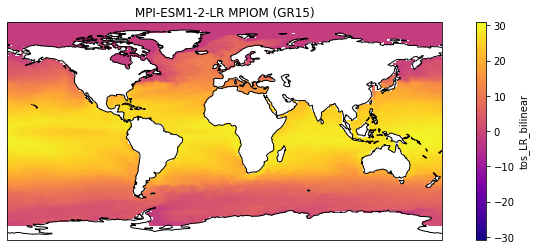

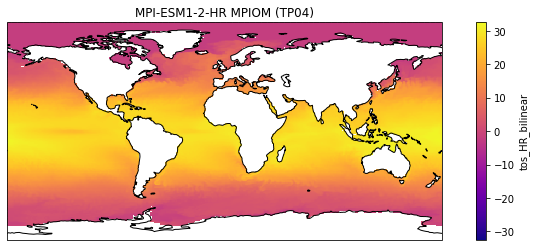

In [20]:
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.PlateCarree())
ds_out["tos_LR_bilinear"].isel(time=0).plot.pcolormesh(ax=ax, x='lon', y='lat', cmap="plasma");
ax.coastlines();
ax.set_title('MPI-ESM1-2-LR MPIOM (GR15)');

plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.PlateCarree())
ds_out["tos_HR_bilinear"].isel(time=0).plot.pcolormesh(ax=ax, x='lon', y='lat', cmap="plasma");
ax.coastlines();
ax.set_title('MPI-ESM1-2-HR MPIOM (TP04)');

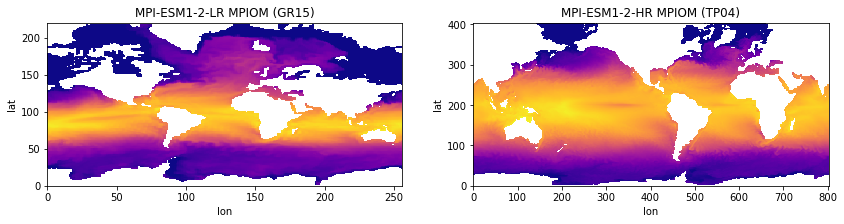

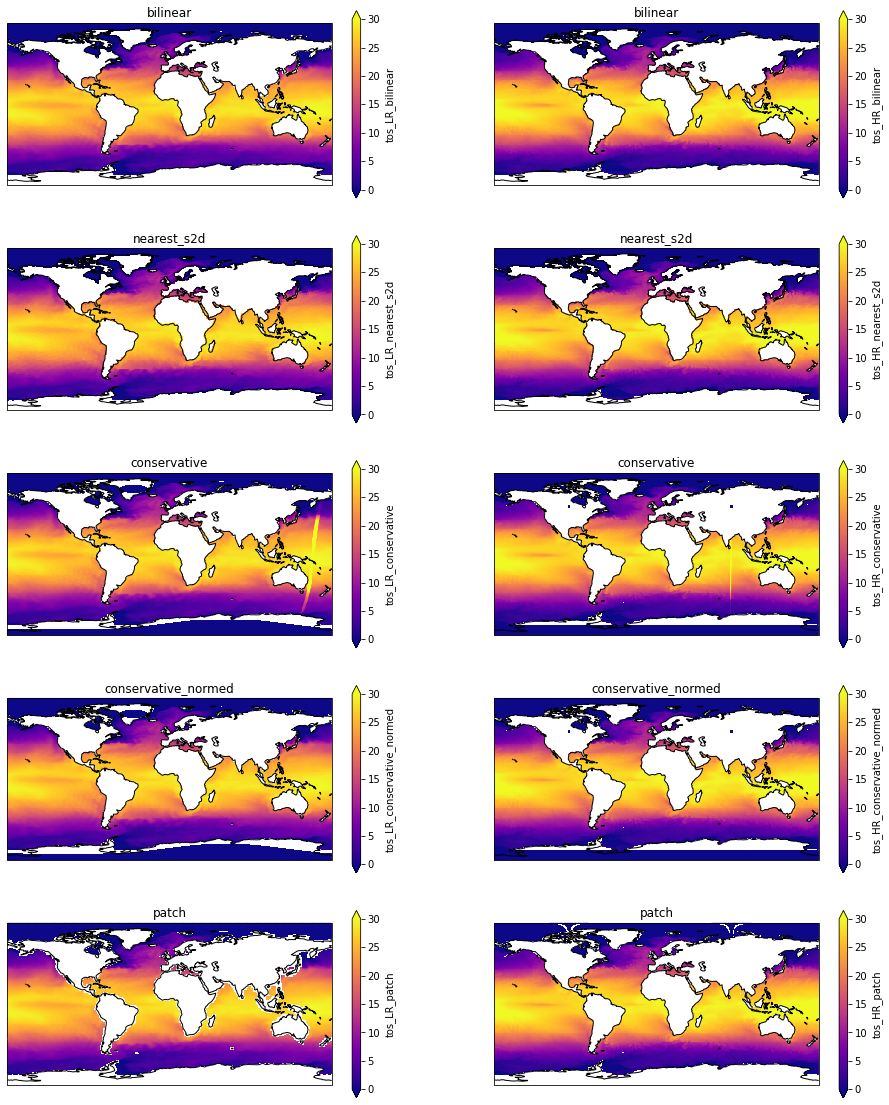

In [21]:
# Create 1st panel plot (data on original grid)
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 3))

axes[0].pcolormesh(ds_LR.tos.isel(time=0).values[::-1,:], cmap="plasma")
axes[1].pcolormesh(ds_HR.tos.isel(time=0).values[::-1,:], cmap="plasma")  
axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');



# Create 2nd panel plot (regridded data)
fig, axes = plt.subplots(ncols=2, nrows=len(method_list), 
                         figsize=(16, 4*len(method_list)), # global
                         #figsize=(10, 4*len(method_list)), # Japan
                         subplot_kw={'projection': ccrs.PlateCarree()})

i=0
for ax in axes.flat:
    if i%2==0:
        # Regridded data (from LR)
        method=method_list[int(i/2)]
        ds_out["tos_LR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method); 
    else:
        # Regridded data (from HR)        
        ds_out["tos_HR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method); 

    # Coast lines and limits
    ax.coastlines()   
    #ax.set_ylim([25, 50]);
    #ax.set_xlim([125, 150]);
    
    # increment
    i+=1  

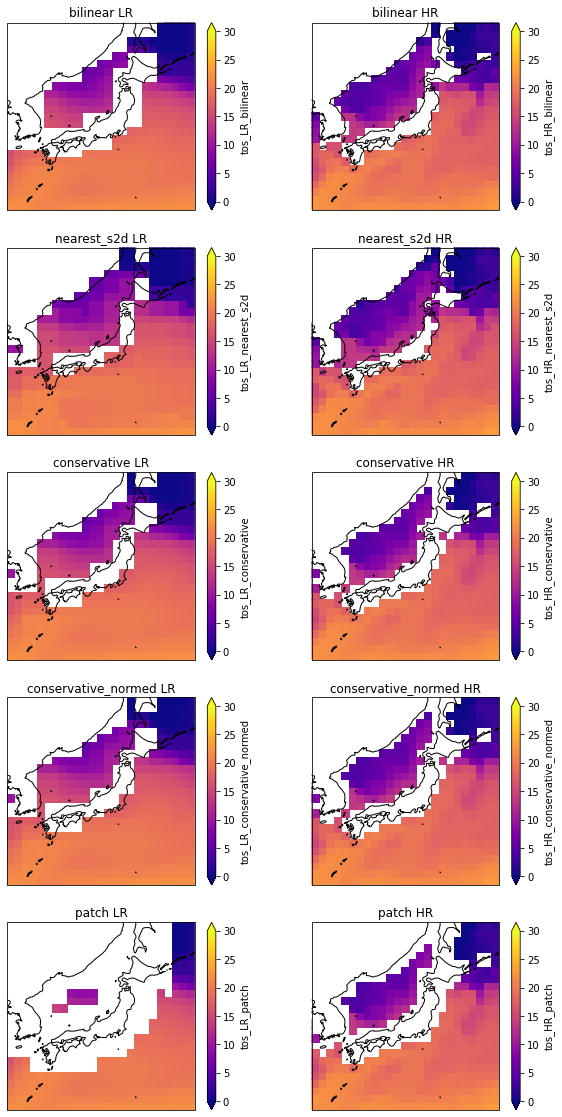

In [22]:
# Create 2nd panel plot again to only include Japan (regridded data)
fig, axes = plt.subplots(ncols=2, nrows=len(method_list), 
                         #figsize=(16, 4*len(method_list)), # global
                         figsize=(10, 4*len(method_list)), # Japan
                         subplot_kw={'projection': ccrs.PlateCarree()})

i=0
for ax in axes.flat:
    if i%2==0:
        # Regridded data (from LR)
        method=method_list[int(i/2)]
        ds_out["tos_LR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method+" LR"); 
    else:
        # Regridded data (from HR)        
        ds_out["tos_HR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method+" HR"); 

    # Coast lines and limits
    ax.coastlines()   
    ax.set_ylim([25, 50]);
    ax.set_xlim([125, 150]);
    
    # increment
    i+=1  

Patch does not seem to be the first choice for masked data, and so does nearest_s2d.

### Mask data on the destination grid that has no expression on the source grid (after regridding)
This has still to be adressed. With the exception of nearest-neighbour interpolation this data is set to 0 by xESMF. Is there a method within ESMPy/xESMF to set this values to NaN instead?

A workaround (for anything but nearest-neighbour) might be to regrid a mask using the same weights and set all outcoming values==0 to NaN:

In [23]:
# Define the source-grid masks by setting all data values to 1
# (I imagine setting all NaN values to 0 might prevent one from using the same regridding weights)

ds_LR["mask_LR"]=xr.ufuncs.isnan(ds_LR["tos"].isel(time=0))
ds_LR["mask_LR"]=xr.where(ds_LR["mask_LR"]==0,1,np.nan)

ds_HR["mask_HR"]=xr.ufuncs.isnan(ds_HR["tos"].isel(time=0))
ds_HR["mask_HR"]=xr.where(ds_HR["mask_HR"]==0,1,np.nan)

In [24]:
# Regrid these "masks" using the weights generated above

for method in method_list:
    ds_out["mask_LR_"+method]=regridderLR[method](ds_LR.mask_LR)
    ds_out["mask_HR_"+method]=regridderHR[method](ds_HR.mask_HR)

In [25]:
# Apply the masks on the regridded data

for method in method_list:
    ds_out["tos_LR_"+method]=xr.where(ds_out["mask_LR_"+method]==0, np.nan, ds_out["tos_LR_"+method])
    ds_out["tos_HR_"+method]=xr.where(ds_out["mask_HR_"+method]==0, np.nan, ds_out["tos_HR_"+method])

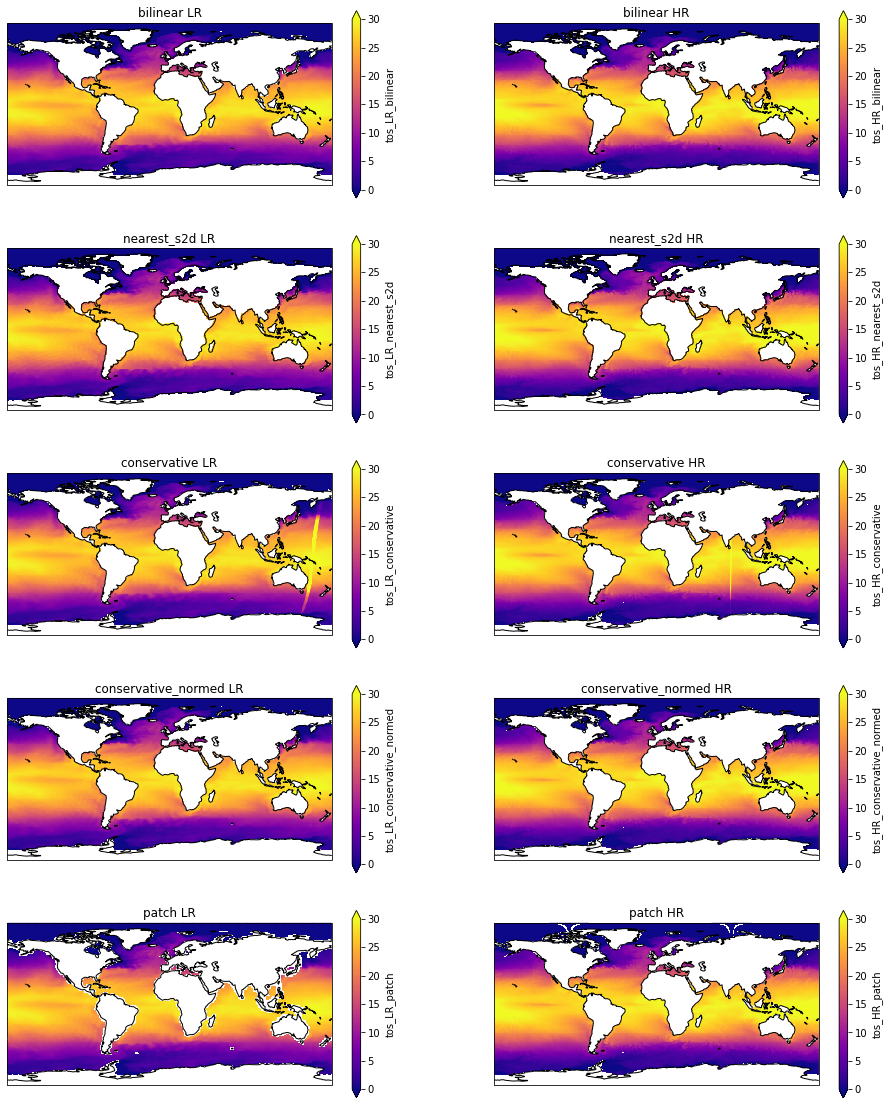

In [26]:
# Produce above plots again to see that unmatched cells should be masked now 
#  (except for nearest_s2d, however the area is already masked in this case, but why?)

fig, axes = plt.subplots(ncols=2, nrows=len(method_list), 
                         figsize=(16, 4*len(method_list)), # global
                         #figsize=(10, 4*len(method_list)), # Japan
                         subplot_kw={'projection': ccrs.PlateCarree()})

i=0
for ax in axes.flat:
    if i%2==0:
        # Regridded data (from LR)
        method=method_list[int(i/2)]
        ds_out["tos_LR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method+" LR"); 
    else:
        # Regridded data (from HR)        
        ds_out["tos_HR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method+" HR"); 

    # Coast lines and limits
    ax.coastlines()   
    #ax.set_ylim([25, 50]);
    #ax.set_xlim([125, 150]);
    
    # increment
    i+=1  

For nearest_s2d one could use the mask for bilinear regridding: 
```outdata_nearest_s2d[np.isnan(outdata_bilinear)] = np.nan```

### Mask data on the destination grid that has no expression on the source grid (before regridding)

There is a way of masking of out-of-source-domain-values 
by manipulating the regridding weights (using 
https://github.com/JiaweiZhuang/xESMF/issues/15):


In [27]:
import scipy
def add_matrix_NaNs(regridder):
    """Add Nans to matrices, which makes any output cell with a weight from a NaN input cell = NaN"""
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    # indptr: https://stackoverflow.com/questions/52299420/scipy-csr-matrix-understand-indptr
    # Creates array with length nrows+1 with information about non-zero values,
    #  with np.diff calculating how many non-zero elements there are in each row
    num_nonzeros = np.diff(M.indptr) 
    # Setting rows with only zeros to NaN
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

In [28]:
# Apply Masking of out-of-domain-values
for method in method_list: 
    regridderLR[method]=add_matrix_NaNs(regridderLR[method])
    regridderHR[method]=add_matrix_NaNs(regridderHR[method])

In [29]:
# Perform regridding once more with modified weight matrices
for method in method_list:
    ds_out["tos_LR_"+method]=regridderLR[method](ds_LR.tos)
    ds_out["tos_HR_"+method]=regridderHR[method](ds_HR.tos)
ds_out

<xarray.Dataset>
Dimensions:                      (lat: 180, lat1: 181, lon: 360, lon1: 361, time: 60)
Coordinates:
  * lat                          (lat) float64 -89.5 -88.5 -87.5 ... 88.5 89.5
  * lon                          (lon) float64 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2010-01-16T12:00:00 .....
    member_id                    <U8 'r1i1p1f1'
Dimensions without coordinates: lat1, lon1
Data variables:
    lat_b                        (lat1) float64 -90.0 -89.0 -88.0 ... 89.0 90.0
    lon_b                        (lon1) float64 0.0 1.0 2.0 ... 359.0 360.0
    tos_LR_bilinear              (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_HR_bilinear              (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_LR_nearest_s2d           (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_HR_nearest_s2d           (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_LR_conservative          (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_HR_conservative          (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_LR_conservative_normed   (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_HR_conservative_normed   (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_LR_patch                 (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    tos_HR_patch                 (time, lat, lon) float64 dask.array<chunksize=(60, 180, 360), meta=np.ndarray>
    mask_LR_bilinear             (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    mask_HR_bilinear             (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    mask_LR_nearest_s2d          (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    mask_HR_nearest_s2d          (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    mask_LR_conservative         (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    mask_HR_conservative         (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    mask_LR_conservative_normed  (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    mask_HR_conservative_normed  (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    mask_LR_patch                (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    mask_HR_patch                (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>

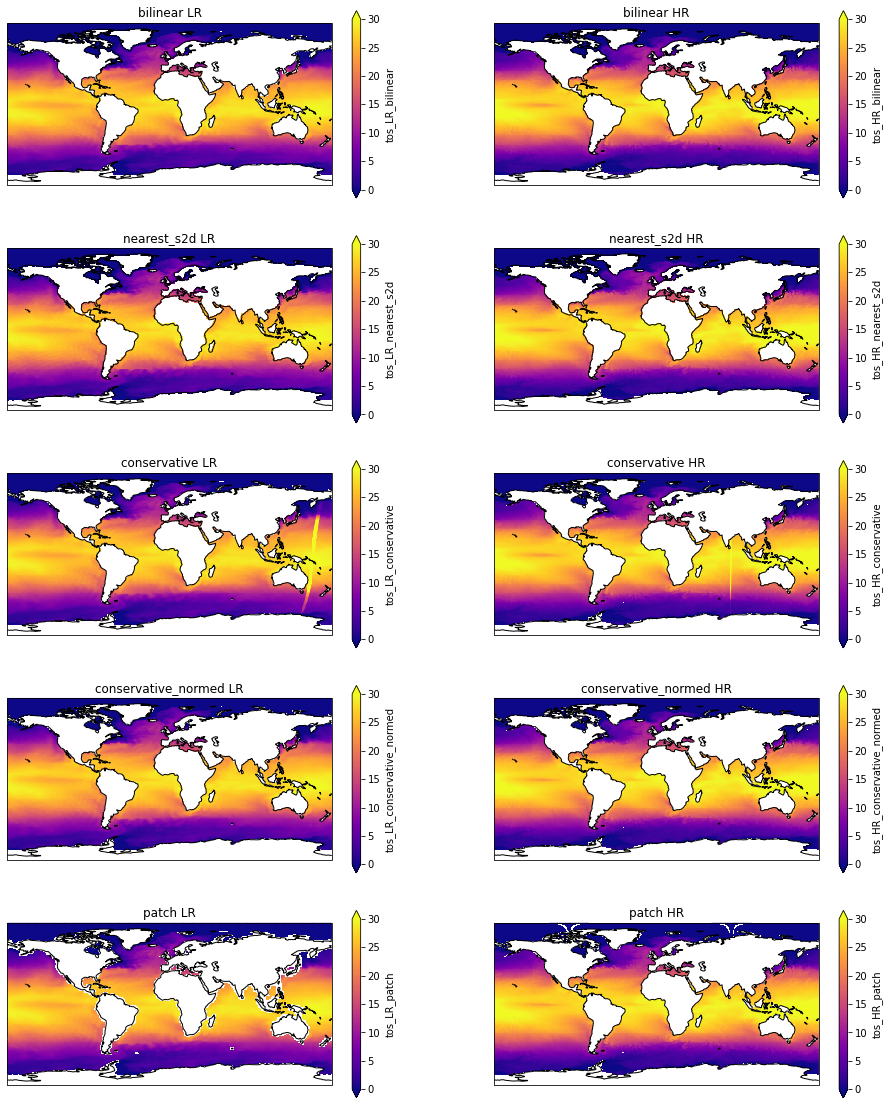

In [30]:
# Produce above plots again to see that unmatched cells should be masked now 
#  (except for nearest_s2d, however the area is already masked in this case, but why?)

fig, axes = plt.subplots(ncols=2, nrows=len(method_list), 
                         figsize=(16, 4*len(method_list)), # global
                         #figsize=(10, 4*len(method_list)), # Japan
                         subplot_kw={'projection': ccrs.PlateCarree()})

i=0
for ax in axes.flat:
    if i%2==0:
        # Regridded data (from LR)
        method=method_list[int(i/2)]
        ds_out["tos_LR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method+" LR"); 
    else:
        # Regridded data (from HR)        
        ds_out["tos_HR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method+" HR"); 

    # Coast lines and limits
    ax.coastlines()   
    #ax.set_ylim([25, 50]);
    #ax.set_xlim([125, 150]);
    
    # increment
    i+=1  

### Save and restore weights

In [31]:
# Save to disk for later use:
for method in method_list: 
    print(regridderLR[method].filename)
    print(regridderHR[method].filename)
    #regridderLR[method].to_netcdf(regridderLR[method].filename)
    #regridderHR[method].to_netcdf(regridderHR[method].filename)

# Example, bilinear HR
print("\nExample:")
weightfile=regridderHR["bilinear"].to_netcdf(regridderHR["bilinear"].filename)
print(weightfile)

bilinear_220x256_180x360_peri.nc
bilinear_404x802_180x360_peri.nc
nearest_s2d_220x256_180x360_peri.nc
nearest_s2d_404x802_180x360_peri.nc
conservative_220x256_180x360.nc
conservative_404x802_180x360.nc
conservative_normed_220x256_180x360.nc
conservative_normed_404x802_180x360.nc
patch_220x256_180x360_peri.nc
patch_404x802_180x360_peri.nc

Example:
bilinear_404x802_180x360_peri.nc


In [32]:
%%bash -s "$weightfile"
echo "Size of the weightfile: $(du -sh $1)"

Size of the weightfile: 32M	bilinear_404x802_180x360_peri.nc


In [33]:
# Read weights from disk
%time regridderHR_bilinear_restored = xe.Regridder(ds_in_HR, ds_out, 'bilinear', weights=weightfile)

CPU times: user 62 ms, sys: 61 ms, total: 123 ms
Wall time: 122 ms


In [34]:
# Regrid
ds_out["tos_HR_bilinear_restored"] = regridderHR_bilinear_restored(ds_HR['tos'])

In [35]:
# Compare with previous result
#xr.testing.assert_identical
np.testing.assert_array_equal(ds_out["tos_HR_bilinear"].values, 
                              ds_out["tos_HR_bilinear_restored"].values)

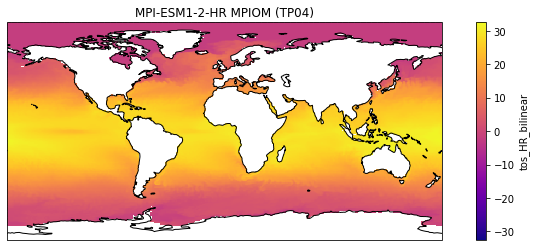

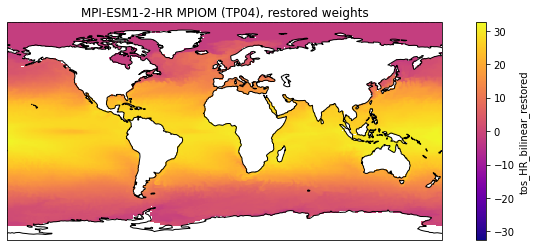

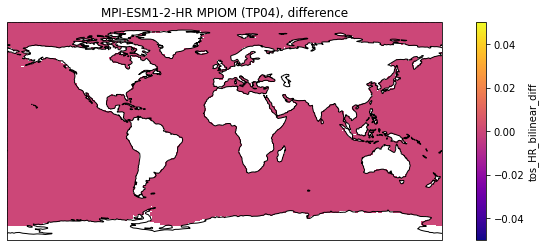

In [36]:
# Plot

plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.PlateCarree())
ds_out["tos_HR_bilinear"].isel(time=0).plot.pcolormesh(ax=ax, x='lon', y='lat', cmap="plasma");
ax.coastlines();
ax.set_title('MPI-ESM1-2-HR MPIOM (TP04)');

plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.PlateCarree())
ds_out["tos_HR_bilinear_restored"].isel(time=0).plot.pcolormesh(ax=ax, x='lon', y='lat', cmap="plasma");
ax.coastlines();
ax.set_title('MPI-ESM1-2-HR MPIOM (TP04), restored weights');

plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.PlateCarree())
ds_out["tos_HR_bilinear_diff"]=ds_out["tos_HR_bilinear_restored"]-ds_out["tos_HR_bilinear"]
ds_out["tos_HR_bilinear_diff"].isel(time=0).plot.pcolormesh(ax=ax, x='lon', y='lat', cmap="plasma");
ax.coastlines();
ax.set_title('MPI-ESM1-2-HR MPIOM (TP04), difference');